<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#佐藤・Tate予想の数値的確認" data-toc-modified-id="佐藤・Tate予想の数値的確認-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>佐藤・Tate予想の数値的確認</a></span></li></ul></div>

### 佐藤・Tate予想の数値的確認

* [佐藤・テイト予想 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%BD%90%E8%97%A4%E3%83%BB%E3%83%86%E3%82%A4%E3%83%88%E4%BA%88%E6%83%B3)

$E$ を有理数体上定義された楕円曲線であるとし, 素数位数 $p$ の有限体上での有理点の個数を $S_p$ と書き, $a_p = p+1-S_p$ とおく. このとき, [楕円曲線に関するHasseの定理](https://en.wikipedia.org/wiki/Hasse%27s_theorem_on_elliptic_curves)(Weil予想のひな形)によって,

$$
|a_p| \leqq 2\sqrt{p}
$$

が成立している. すなわち, $x_p = a_p/(2\sqrt{p})$ とおくと, $x_p$ は $-1$ と $1$ のあいだに分布するようになる. 

楕円曲線 $E$ が虚数乗法を持たないならば, $x_p$ 達の分布が半円則に従うという主張が佐藤・Tate予想である. この予想は大変深い数学的予想であり, 21世紀になってから解決された.  

半円則とは確率密度函数

$$
\varphi(x) = \frac{2}{\pi}\sqrt{1-x^2} \quad (|x|\leqq 1)
$$

を持つ確率分布のことである.  $x_p = \cos\theta_p$ を満たす $0\leqq\theta_p\leqq\pi$ を取ると, 佐藤・Tate予想は $\theta_p$ 達が $\sin^2$ 分布に従うという主張に言い換えられる. $\sin^2$ 分布とは確率密度函数

$$
\psi(\theta) = \frac{2}{\pi}\sin^2\theta \quad (0\leqq\theta\leqq\pi)
$$

を持つ確率分布のことである. 

佐藤・Tate予想については以下の解説が面白く読める:

* 数学のたのしみ, 2008 最終号, フォーラム: 現代数学のひろがり, 佐藤-テイト予想の解決と展望

* 難波完爾, Dedeking $\eta$ 函数と佐藤 $\sin^2$ 予想, 2005.12.07 [PDF](https://www2.tsuda.ac.jp/suukeiken/math/suugakushi/sympo16/16_8nanba.pdf)

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environ

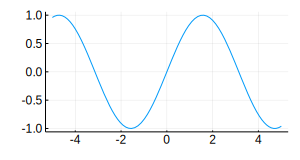


plot(sin) -> 16.132963 seconds (22.46 M allocations: 1.086 GiB, 2.09% gc time)

using PyPlot ->  7.540091 seconds (10.27 M allocations: 504.702 MiB, 2.05% gc time)

using DifferentialEquations ->

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("DifferentialEquations")
Pkg.add("Combinatorics")
Pkg.add("Distributed")
Pkg.add("Distributions")
Pkg.add("Libdl")
Pkg.add("LinearAlgebra")
Pkg.add("Optim")
Pkg.add("Primes")
Pkg.add("ProgressMeter")
Pkg.add("RCall")
Pkg.add("SpecialFunctions")
Pkg.add("Statistics")
Pkg.add("SymPy")

print("using Plots ->")
@time using Plots
gr(legend=false); ENV["PLOTS_TEST"] = "true"

print("\nplot(sin) ->")
@time plot(sin, size=(300, 160)) |> display # コンパイル

print("\nusing PyPlot ->")
@time using PyPlot: PyPlot, plt

print("\nusing DifferentialEquations ->")
@time using DifferentialEquations

using Base64
using Combinatorics
using Distributed
using Distributions
using Libdl
using LinearAlgebra
using Optim
using Primes
using ProgressMeter
using Random: seed!
using RCall
using SpecialFunctions
using Statistics
using SymPy: SymPy, sympy, Sym, @vars, @syms, simplify, oo, PI

ldisp(x...) = display("text/html", raw"$$" * prod(x) * raw"$$")

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

In [2]:
Pkg.add("StatsBase")
using StatsBase

function nrationalpoints_naive(f, p)
    @distributed (+) for x in 0:p-1
        s = 0
        for y in 0:p-1
            s += ifelse(mod(f(x,y),p) == 0, 1, 0)
        end
        s
    end
end

function plot_SatoTate_naive(f; figtitle="Sato-Tate conjecture", N=2^12)
    P = primes(N)
    @show N, length(P)
    @time S = nrationalpoints_naive.(f, P) .+ 1 # "+1" は無限遠点の個数
    plot_SatoTate(P, S; figtitle=figtitle)
end

function nrationalpoints_legendre(g, p)
    @distributed (+) for x in 0:p-1
        l = legendresymbol(mod(g(x),p), p)
        ifelse(l == 1, 2, ifelse(l == -1, 0, 1))
    end
end

function plot_SatoTate_legendre(f; figtitle="Sato-Tate conjecture", N=2^12)
    P = primes(N)
    @show N, length(P)
    @time S = nrationalpoints_legendre.(f, P) .+ 1 # "+1" は無限遠点の個数
    plot_SatoTate(P, S; figtitle=figtitle)
end

function plot_SatoTate(P, S; figtitle="Sato-Tate conjecture")
    a = (P .+ 1) - S

    @show count(abs.(a) .> 2sqrt.(P)) # Weil予想の確認
    X = a ./ (2sqrt.(P)) # -1 から 1 の区間に入るように正規化
    θ = acos.(X)

    x = range(-1, 1, length=200)
    g(x) = (2/π)*sqrt(1-x^2) # 半円則

    t = range(0, π, length=200)
    h(t) = (2/π)*sin(t)^2 # sin^2 分布

    sleep(0.1)
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    plt.hist(X, normed=true, bins=21, alpha=0.5, label="\$a_p/(2\\sqrt{p})\$")
    plt.plot(x, g.(x), color="red", ls="--", label="\$y=(2/\\pi)\\sqrt{1-x^2}\$")
    plt.xlabel("\$x\$")
    plt.grid(ls=":")
    plt.legend(fontsize=9)
    plt.title(figtitle, fontsize=10)
    
    plt.subplot(122)
    plt.hist(θ, normed=true, bins=21, alpha=0.5, label="\$\\arccos(a_p/(2\\sqrt{p}))")
    plt.plot(t, h.(t), color="red", ls="--", label="\$y=(2/\\pi)\\sin^2\\theta\$")
    plt.xlabel("\$\\theta\$")
    plt.grid(ls=":")
    plt.legend(fontsize=8)
    plt.title(figtitle, fontsize=10)
    plt.tight_layout()
    println(fit(Histogram, 180θ/π,  0.0:10.0:180.0, closed= :right))
end

function plot_SatoTate_legendre_4(f; figtitle="Sato-Tate conjecture", N=2^12)
    P = primes(N)
    @show N, length(P)
    @time S = nrationalpoints_legendre.(f, P) .+ 1 # "+1" は無限遠点の個数
    plot_SatoTate_4(P, S; figtitle=figtitle)
end

function plot_SatoTate_4(P, S; figtitle="Sato-Tate conjecture")
    a = (P .+ 1) - S

    @show count(abs.(a) .> 4sqrt.(P)) # Weil予想の確認
    X = a ./ (4sqrt.(P)) # -1 から 1 の区間に入るように正規化
    θ = acos.(X)

    x = range(-1, 1, length=200)
    g(x) = (6/π)*sqrt(1-x^2) # 半円則

    t = range(0, π, length=200)
    h(t) = (6/π)*sin(t)^2 # sin^2 分布

    sleep(0.1)
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    plt.hist(X, normed=true, bins=21, alpha=0.5, label="\$a_p/(2\\sqrt{p})\$")
    plt.plot(x, g.(x), color="red", ls="--", label="\$y=(2/\\pi)\\sqrt{1-x^2}\$")
    plt.xlabel("\$x\$")
    plt.grid(ls=":")
    plt.legend(fontsize=9)
    plt.title(figtitle, fontsize=10)
    
    plt.subplot(122)
    plt.hist(θ, normed=true, bins=21, alpha=0.5, label="\$\\arccos(a_p/(2\\sqrt{p}))")
    plt.plot(t, h.(t), color="red", ls="--", label="\$y=(2/\\pi)\\sin^2\\theta\$")
    plt.xlabel("\$\\theta\$")
    plt.grid(ls=":")
    plt.legend(fontsize=8)
    plt.title(figtitle, fontsize=10)

    plt.tight_layout()
end

 Resolving package versions...
  Updating `/opt/julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.3/Manifest.toml`
 [no changes]


plot_SatoTate_4 (generic function with 1 method)

楕円曲線 $y^2 = x^3 + x + 1$ の場合の佐藤・Tate予想を数値的に確認.

Legendre記号を使った計算によって高速化し, より多数の素数における有理点の個数を求める.

(N, length(P)) = (16384, 1900)
 13.689754 seconds (9.86 M allocations: 406.471 MiB, 0.72% gc time)
count(abs.(a) .> 2 * sqrt.(P)) = 0
Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:10.0:180.0
weights: [1, 16, 44, 63, 101, 130, 178, 200, 230, 198, 201, 176, 129, 112, 70, 29, 17, 5]
closed: right
isdensity: false


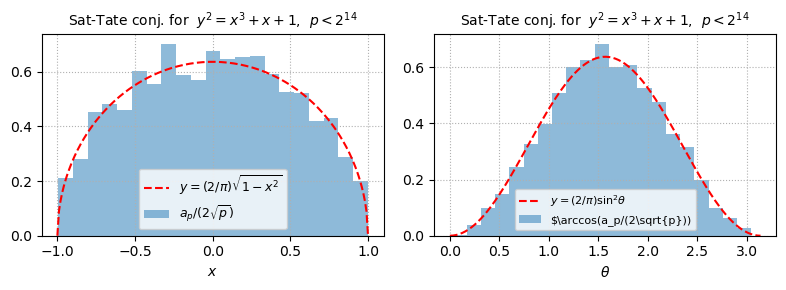

In [3]:
addedprocs = addprocs(40)
@everywhere using Combinatorics: legendresymbol
@everywhere g(x) = x^3+x+1
N = 2^14
figtitle = "Sat-Tate conj. for  \$y^2 = x^3+x+1\$,  \$p < 2^{14}\$"
plot_SatoTate_legendre(g, figtitle=figtitle, N=N)
rmprocs(addedprocs);